In [ ]:
!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
!pip3 install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 34 kB/s 
     |████████████████████████████████| 199 kB 47.8 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=3acde1f7ac3623c56855639fe701f753ee6b4f00a44565018d002f46e78e4847
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder.master("local").appName("used-camping-product").getOrCreate()

In [ ]:
directory = "/content/drive/MyDrive"
filename = "jungo1.csv"

In [ ]:
directory = "/home/lab14/data"
filename = "jungo1.csv"

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumGothic')

In [ ]:
from datetime import date
date.today().isoformat()

jungo1 = pd.read_csv(f"{directory}/jungo1.csv", header='infer')
jungo2 = pd.read_csv(f"{directory}/jungo2.csv", header='infer')
jungo3 = pd.read_csv(f"{directory}/jungo3.csv", header='infer')
jungo1['c_date']='2022-06-10'
jungo2['c_date']='2022-06-11'
jungo3['c_date']='2022-06-12'
jungo_pdf = pd.concat([jungo1,jungo2,jungo3], ignore_index=True)
jungo_pdf

,Unnamed: 0,category,title,sell_comp,writer,w_date,views,c_date
0,0,텐트/타프,미스터305 (블랙) 롱플+우레탄&숏+우레탄&이너 스킨2개 ((풀구성)),판매,뉴무꼬,09:07,10,2022-06-10
1,1,텐트/타프,캠토리 슬라이드폴 280,판매,91듀듀,09:06,10,2022-06-10
2,2,텐트/타프,힐맨 얼리버드 업 스마트 텐트 2인용 팝니다.,판매,BBX,09:05,4,2022-06-10
3,3,텐트/타프,오크돔 M 카키 + 신 베티/우레탄창,판매,안녕뽀로로,09:05,21,2022-06-10
4,4,텐트/타프,힐레베르그 니악 레드 미개봉,판매,학칸이,09:04,22,2022-06-10
...,...,...,...,...,...,...,...,...
99386,33142,키즈 캠핑/완구,"물놀이용으로,겨울에는 방한매트로 사용하는 어린이용 튜브",판매,oommm1452,2022.05.26.,51,2022-06-12
99387,33143,키즈 캠핑/완구,루엣비든 셔링 경량 해먹 270 세트 부쉬크래프트 캠핑 (웨빙 포함),완료,둘리할매,2022.05.25.,108,2022-06-12
99388,33144,키즈 캠핑/완구,장난감 팝니다.,판매,멀더바래요원,2022.05.25.,69,2022-06-12
99389,33145,키즈 캠핑/완구,물놀이 수중 전동 스쿠터,완료,kf2337,2022.05.25.,133,2022-06-12


In [ ]:
# used_product_pdf['views']=used_product_pdf['views'].map(lambda x: int(x.replace(',','')))
# used_product_pdf.sort_values(by='views',ascending=False)

NameError: ignored

In [ ]:
#used_product_sdf=spark.read.csv(f"file:///{directory}/{filename}", header=True, inferSchema=True)

In [ ]:
#used_product_sdf.createOrReplaceTempView("used_product_info")

In [ ]:
from pyspark.sql.types import LongType, IntegerType
def string_to_int(view):
    if len(view) != 11:
        return int(view.replace(',',''))
    else:
        return 0
    
spark.udf.register("string_to_int", string_to_int)

<function __main__.string_to_int>

In [ ]:
query="""
    select *
    from (select *, string_to_int(views) as _int
    from used_product_info)
    order by _int DESC

"""
used_product_sdf=spark.sql(query)
used_product_sdf.describe()

AnalysisException: ignored

In [ ]:
from pyspark.sql.functions import col, lit

used_product_sdf=used_product_sdf.withColumn("_int",col("_int").cast(IntegerType()))

used_product_sdf.printSchema()


NameError: ignored

In [ ]:
used_product_sdf=used_product_sdf.withColumn("c_date",lit('2022-06-10'))

In [ ]:
used_product_sdf.orderBy(col("_int").desc()).select(used_product_sdf.columns).show(50)

+-----+------------------+----------------------------------+---------+-------------------+-----------+-----+----+----------+
|  _c0|          category|                             title|sell_comp|             writer|     w_date|views|_int|    c_date|
+-----+------------------+----------------------------------+---------+-------------------+-----------+-----+----+----------+
|12673|         텐트/타프|  캠핑 접습니다. 하나 둘 사모으...|     완료|         미NI멀캠퍼|2022.05.28.|2,067|2067|2022-06-10|
|32377|      기타캠핑용품|   (택배X) 캠핑용품 판매합니다 ...|     완료|             시크몽|2022.05.28.|1,727|1727|2022-06-10|
|23585|  버너/화로/바베큐|  스노우피크. 홀리데이 등 캠핑 ...|     판매|           우주안녕|2022.06.05.|1,292|1292|2022-06-10|
|28064|      기타캠핑용품|               캠핑용품 정리합니다|     판매|               두릎|2022.06.07.|1,210|1210|2022-06-10|
|29254|      기타캠핑용품|헬리녹스 의자 및 테이블 판매합니다|     완료|             서레이|2022.06.04.|1,067|1067|2022-06-10|
| 7772|         텐트/타프| 비바돔 플러스 올리브그린 1회사...|     완료|             아고라|2022.06.02.|  908| 908|2022-06-10|
|3

In [ ]:
# 2주 이내에서 가장 인기 있는 게시글
used_product_sdf.orderBy(col("_int").desc()).select('category','title','sell_comp','writer','w_date','_int').show(1)

+---------+--------------------------------+---------+----------+-----------+----+
| category|                           title|sell_comp|    writer|     w_date|_int|
+---------+--------------------------------+---------+----------+-----------+----+
|텐트/타프|캠핑 접습니다. 하나 둘 사모으...|     완료|미NI멀캠퍼|2022.05.28.|2067|
+---------+--------------------------------+---------+----------+-----------+----+
only showing top 1 row



In [ ]:
from datetime import date
date.today().isoformat()

'2022-06-15'

In [ ]:
# 시각화 해보기
# used_product_pdf = used_product_sdf.toPandas()
# used_product_pdf

,_c0,category,title,sell_comp,writer,w_date,views,_int,c_date
0,284,텐트/타프,트레블첵 라움 미니 베이지 1.0 텐트 판매 합니다.,판매,스티븐제라드0804,2022.06.09.,99,99,2022-06-10
1,545,텐트/타프,네이처하이크 에어텐트 12.0 박스채새제품 판매합니다 울산 경주 포항 대구,판매,행동대원,2022.06.09.,99,99,2022-06-10
2,586,텐트/타프,유니프레임 레보룸4 10만,예약중,재미니,2022.06.09.,99,99,2022-06-10
3,1341,텐트/타프,"노스피크 루나타프M(레이븐그레이),폴대,웨빙판매",판매,으라차차김대리,2022.06.09.,99,99,2022-06-10
4,1420,텐트/타프,헬스포츠 블라프엘,판매,브라더시흥,2022.06.09.,99,99,2022-06-10
...,...,...,...,...,...,...,...,...,...
32992,29899,기타캠핑용품,"닌텐도 위 2인세트 (150가지 게임세팅, 주변기기 포함)",완료,지우캠핑사랑,2022.06.03.,10,10,2022-06-10
32993,21201,코펠/식기/주방용품,플랜잇 핸드프레소 2in1 판매합니다,판매,낙타79,10:37,1,1,2022-06-10
32994,15147,테이블/의자,스노우피크 쇼트체어 그레이 정가,판매,블랙기사,10:17,0,0,2022-06-10
32995,21197,코펠/식기/주방용품,미니멀웍스 그리들 미니+전용가방,판매,몽글이88,11:03,0,0,2022-06-10


In [ ]:
# views 정수형 변환
jungo_pdf['views']=jungo_pdf['views'].map(lambda x: int(x.replace(',','')) if len(x)!=11 else 0)
jungo_pdf

,Unnamed: 0,category,title,sell_comp,writer,w_date,views,c_date
0,0,텐트/타프,미스터305 (블랙) 롱플+우레탄&숏+우레탄&이너 스킨2개 ((풀구성)),판매,뉴무꼬,09:07,10,2022-06-10
1,1,텐트/타프,캠토리 슬라이드폴 280,판매,91듀듀,09:06,10,2022-06-10
2,2,텐트/타프,힐맨 얼리버드 업 스마트 텐트 2인용 팝니다.,판매,BBX,09:05,4,2022-06-10
3,3,텐트/타프,오크돔 M 카키 + 신 베티/우레탄창,판매,안녕뽀로로,09:05,21,2022-06-10
4,4,텐트/타프,힐레베르그 니악 레드 미개봉,판매,학칸이,09:04,22,2022-06-10
...,...,...,...,...,...,...,...,...
99386,33142,키즈 캠핑/완구,"물놀이용으로,겨울에는 방한매트로 사용하는 어린이용 튜브",판매,oommm1452,2022.05.26.,51,2022-06-12
99387,33143,키즈 캠핑/완구,루엣비든 셔링 경량 해먹 270 세트 부쉬크래프트 캠핑 (웨빙 포함),완료,둘리할매,2022.05.25.,108,2022-06-12
99388,33144,키즈 캠핑/완구,장난감 팝니다.,판매,멀더바래요원,2022.05.25.,69,2022-06-12
99389,33145,키즈 캠핑/완구,물놀이 수중 전동 스쿠터,완료,kf2337,2022.05.25.,133,2022-06-12


In [ ]:
jungo_sdf=spark.createDataFrame(jungo_pdf)

In [ ]:
from pyspark.sql.functions import col
# 6월 12일 기준 인기 게시글
#jungo_sdf.filter("c_date = '2022-06-12'").orderBy(col('views').desc()).show(1)
today_jungo = jungo_sdf.filter("c_date = '2022-06-12'").orderBy(col('views').desc()).toPandas()
today_jungo[['title', 'views']][:50]

,title,views
0,스노우피크. 홀리데이 등 캠핑 장비 일체 판매합니다.,1398
1,캠핑용품 정리합니다,1393
2,비바돔 플러스 쉘터 카키 미개봉 팝니다.,1241
3,헬리녹스 의자 및 테이블 판매합니다,1095
4,스노우피크 igt용품 및 체어류 판매,931
5,비바돔 플러스 올리브그린 1회사용 팝니다.,927
6,헬리녹스 터널 판매(거래중),889
7,캠핑을 접은 관계로 텐트+용품 싹 정리하려고 합니다,880
8,캠핑용품 일부 정리합니다.,851
9,노스피크 퍼시픽 오션 소이밀크,818


In [ ]:
# 상위권 게시글 각 항목 분포 확인
jungo_sdf.filter("c_date = '2022-06-12'").orderBy(col('views').desc()).show(50)

+----------+------------------+----------------------------------+---------+-------------------+-----------+-----+----------+
|Unnamed: 0|          category|                             title|sell_comp|             writer|     w_date|views|    c_date|
+----------+------------------+----------------------------------+---------+-------------------+-----------+-----+----------+
|     23878|  버너/화로/바베큐|  스노우피크. 홀리데이 등 캠핑 ...|     판매|           우주안녕|2022.06.05.| 1398|2022-06-12|
|     29029|      기타캠핑용품|               캠핑용품 정리합니다|     판매|               두릎|2022.06.07.| 1393|2022-06-12|
|      2623|         텐트/타프| 비바돔 플러스 쉘터 카키 미개봉...|     판매|           진지니니|2022.06.09.| 1241|2022-06-12|
|     30157|      기타캠핑용품|헬리녹스 의자 및 테이블 판매합니다|     완료|             서레이|2022.06.04.| 1095|2022-06-12|
|     32763|      기타캠핑용품| 스노우피크 igt용품 및 체어류 판매|     판매|       살사람만저요|2022.05.29.|  931|2022-06-12|
|      9333|         텐트/타프| 비바돔 플러스 올리브그린 1회사...|     완료|             아고라|2022.06.02.|  927|2022-06-12|
|      4

+------------------+-----+
|          category|count|
+------------------+-----+
|  버너/화로/바베큐|    3|
|      기타캠핑용품|    8|
|         텐트/타프|   32|
|       테이블/의자|    5|
|코펠/식기/주방용품|    2|
+------------------+-----+



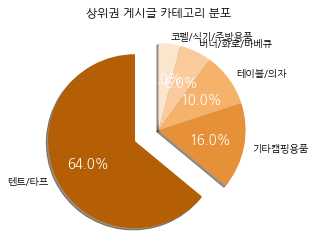

In [ ]:
# 상위권 게시글 카테고리 분포
popular_jungo_sdf = jungo_sdf.filter("c_date = '2022-06-12'").orderBy(col('views').desc()).limit(50)
popular_jungo_sdf.groupBy('category').count().show()
pie_cat = popular_jungo_sdf.groupBy('category').count().toPandas()
pie_cat=pie_cat.sort_values(by=['count'],ascending=False)
labels = pie_cat['category'].iloc[:6]
sizes = pie_cat['count'].iloc[:6]
explode = (0.3, 0,0,0,0)
patches, texts, autotexts = plt.pie(
    sizes,
    explode=explode,
    labels=labels,
    autopct="%1.1f%%",
    shadow=True,
    startangle=90,
    colors = ['#b45f06','#e69138','#f6b26b','#f9cb9c','#fce5cd']
)
# label 텍스트 스타일링
for t in texts:
  t.set_fontsize(10)
  t.set_color('black')

# pie 위의 텍스트에 대한 스타일링
for t in autotexts:
  t.set_fontsize(13)
  t.set_color('white')

plt.title("상위권 게시글 카테고리 분포")

plt.savefig('1.png',transparent=True)
plt.show()

+---------+-----+
|sell_comp|count|
+---------+-----+
|     판매|   22|
|     완료|   28|
+---------+-----+



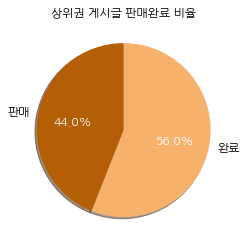

In [ ]:
# 판매 완료 비율 분포
popular_jungo_sdf.groupBy('sell_comp').count().show()
portion_sell_comp=popular_jungo_sdf.groupBy('sell_comp').count().toPandas()
labels = portion_sell_comp['sell_comp']
sizes = portion_sell_comp['count']
explode = (0,0)
patches, texts, autotexts = plt.pie(
    sizes,
    explode=explode,
    labels=labels,
    autopct="%1.1f%%",
    shadow=True,
    startangle=90,
    colors = ['#b45f06','#f6b26b']
)
# label 텍스트 스타일링
for t in texts:
  t.set_fontsize(12)
  t.set_color('black')

# pie 위의 텍스트에 대한 스타일링
for t in autotexts:
  t.set_fontsize(12)
  t.set_color('white')

plt.title("상위권 게시글 판매완료 비율")

plt.savefig('2.png',transparent=True)
plt.show()

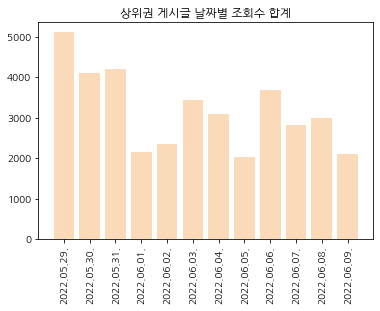

In [ ]:
# 날짜별 게시글 비율 - 딱히 분석 의미 없음

# jungo_sdf.filter(col('w_date')>'2022.05.29').groupBy('w_date').count().show()
# popular_jungo_sdf.describe()
#popular_jungo_sdf.groupBy('w_date').agg(sum('views').alias('sum_views')).show()
bar_plot=jungo_pdf[jungo_pdf['c_date']=='2022-06-12'].sort_values('views', ascending=False).iloc[:50].groupby('w_date').sum('views').sort_values(by='w_date')[['views']]
plt.bar(bar_plot.index, bar_plot['views'], align='center', alpha=0.7, color='#f9cb9c')
plt.xticks(rotation=90)
plt.title('상위권 게시글 날짜별 조회수 합계')
plt.savefig('3.png',transparent=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


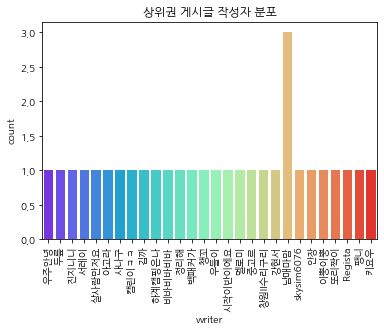

In [ ]:
# 작성자별 비율, 골고루 분포
import seaborn as sns
# popular_jungo_sdf.groupBy('writer').count().show(50)
# writer_count=popular_jungo_sdf.groupBy('writer').count().limit(30).toPandas()
# plt.bar(writer_count['writer'],writer_count['count'] )
# plt.xticks(rotation=90)
# plt.show()
writer_plot=jungo_pdf[jungo_pdf['c_date']=='2022-06-12'].sort_values('views', ascending=False).iloc[:30][['writer']]
sns.countplot(writer_plot['writer'],palette='rainbow')
plt.title('상위권 게시글 작성자 분포')
plt.xticks(rotation=90)
plt.show()

In [ ]:
jungo_sdf=spark.createDataFrame(jungo_pdf)

In [ ]:
jungo_sdf.createOrReplaceTempView("jungo_sdf")
#jungo_sdf.withColumn('view_change',jungo_sdf.filter(jungo_sdf.filter(jungo_sdf['c_date']=='2022-06-12')).select('category','title','writer','w_date') ==jungo_sdf.filter(jungo_sdf['c_date']=='2022-06-11')).select('category','title','writer','w_date')).select('title','views')

In [ ]:
jungo_sdf.filter(jungo_sdf['c_date']=='2022-06-12').select(jungo_sdf.columns).show()

+----------+---------+-----------------------------------+---------+------------+------+-----+----------+
|Unnamed: 0| category|                              title|sell_comp|      writer|w_date|views|    c_date|
+----------+---------+-----------------------------------+---------+------------+------+-----+----------+
|         0|텐트/타프|교환하실분)그라운드웍스 우드랜드...|     판매|  세종조치원| 12:39|    1|2022-06-12|
|         1|텐트/타프|       300D 렉타타프 + 폴대세트 ...|     판매|     miy1835| 12:39|    3|2022-06-12|
|         2|텐트/타프|  스노우피크스피드스코프130폴대T...|     판매|  kikidngur1| 12:38|    4|2022-06-12|
|         3|텐트/타프|    라쿤볼륨업 + 베스티블 + 타포...|     판매|     miy1835| 12:38|    6|2022-06-12|
|         4|텐트/타프|               노스피크 a6 소이밀크|     판매|노래를하면서| 12:38|    5|2022-06-12|
|         5|텐트/타프|            백컨트리 320쉘터 이지폴|     판매|      저팔개| 12:36|   15|2022-06-12|
|         6|텐트/타프|     더 캠퍼 마시모 2P 카모 색상...|     판매|    의정부뚜| 12:36|   13|2022-06-12|
|         7|텐트/타프|  코베아 고스트플러스 아이보리(4...|     판매|  캠퍼달봉이| 12:35|   23|2022

In [ ]:

# def sb(view):
#     if len(view) != 11:
#         return int(view.replace(',',''))
#     else:
#         return 0
    
# spark.udf.register("string_to_int", string_to_int)
query = """
    select temp1.category, temp1.title, temp1.sell_comp, temp1.writer, temp1.w_date, (temp1.views-temp.views) as change
    from (select * from jungo_sdf where c_date = '2022-06-12') as temp1
    join (select * from jungo_sdf where c_date = '2022-06-11') as temp on (temp1.category = temp.category) and (temp1.title = temp.title) and (temp1.writer = temp.writer) and (temp1.w_date = temp.w_date)

"""
hot_jungo_sdf=spark.sql(query)

In [ ]:
# 급상승 게시글 이걸로 위에서 알아봤던 항목 알아보기 가능
hot_jungo_sdf=hot_jungo_sdf.orderBy(col('change').desc()).select(hot_jungo_sdf.columns).limit(50)
hot_jungo_pdf = hot_jungo_sdf.toPandas()


In [ ]:
hot_jungo_pdf[['title','change']]

,title,change
0,비바돔 플러스 쉘터 카키 미개봉 팝니다.,309
1,DOD 가마보코 웨건 + 온핑 웨건상판 판매합니다,197
2,DOD 가마보코 웨건 + 온핑 웨건상판 판매합니다,196
3,노르딕크로스 이클립스돔 22년형 1회피칭,186
4,153매트 전기요 260 전기매트,170
5,헬리녹스 택티컬 리얼트리 체어원 2개 일괄,169
6,코베아 고스트팬텀,149
7,판매완료,143
8,판매완료,133
9,스노우피크 리빙쉘 롱프로 아이보리,124


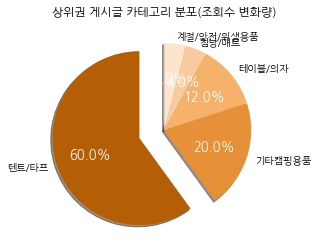

In [ ]:
# 핫 카테고리
hot_pie=hot_jungo_sdf.orderBy(col('change').desc()).select(col('category')).limit(50).groupBy('category').count().toPandas()
hot_pie

hot_pie=hot_pie.sort_values(by=['count'],ascending=False)
labels = hot_pie['category'].iloc[:6]
sizes = hot_pie['count'].iloc[:6]
explode = (0.3, 0,0,0,0)
patches, texts, autotexts = plt.pie(
    sizes,
    explode=explode,
    labels=labels,
    autopct="%1.1f%%",
    shadow=True,
    startangle=90,
    colors = ['#b45f06','#e69138','#f6b26b','#f9cb9c','#fce5cd']
)
# label 텍스트 스타일링
for t in texts:
  t.set_fontsize(10)
  t.set_color('black')

# pie 위의 텍스트에 대한 스타일링
for t in autotexts:
  t.set_fontsize(13)
  t.set_color('white')

plt.title("상위권 게시글 카테고리 분포(조회수 변화량)")
plt.savefig('4.png',transparent=True)
plt.show()

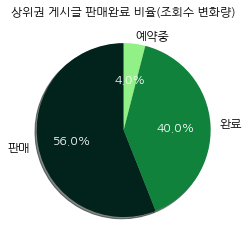

In [ ]:
#핫 판매완료 비율
hot_sell_comp_pie=hot_jungo_sdf.orderBy(col('change').desc()).select(col('sell_comp')).limit(50).groupBy('sell_comp').count().toPandas()
labels = hot_sell_comp_pie['sell_comp']
sizes = hot_sell_comp_pie['count']
explode = (0,0,0)
patches, texts, autotexts = plt.pie(
    sizes,
    explode=explode,
    labels=labels,
    autopct="%1.1f%%",
    shadow=True,
    startangle=90,
    colors = ['#02231c', '#11823b' ,'#91f086']
    
)
# label 텍스트 스타일링
for t in texts:
  t.set_fontsize(12)
  t.set_color('black')

# pie 위의 텍스트에 대한 스타일링
for t in autotexts:
  t.set_fontsize(12)
  t.set_color('white')

plt.title("상위권 게시글 판매완료 비율(조회수 변화량)")
plt.savefig('5.png',transparent=True)
plt.show()

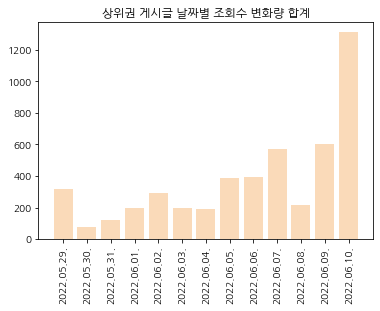

In [ ]:
# 핫 날짜별 분포
hot_bar_plot=hot_jungo_sdf.orderBy(col('change').desc()).groupBy('w_date').sum('change').orderBy('w_date').limit(50).toPandas()
hot_bar_plot
plt.bar(hot_bar_plot['w_date'],hot_bar_plot['sum(change)'],align='center',alpha=0.7, color='#f9cb9c')
plt.xticks(rotation=90)
plt.title('상위권 게시글 날짜별 조회수 변화량 합계')
plt.savefig('6.png',transparent=True)
plt.show()
# bar_plot=jungo_pdf[jungo_pdf['c_date']=='2022-06-12'].sort_values('views', ascending=False).iloc[:50].groupby('w_date').sum('views').sort_values(by='w_date')[['views']]
# plt.bar(bar_plot.index, bar_plot['views'], align='center', alpha=0.7, color='blue')
# plt.xticks(rotation=90)
# plt.title('상위권 게시글 날짜별 조회수 합계')
# plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


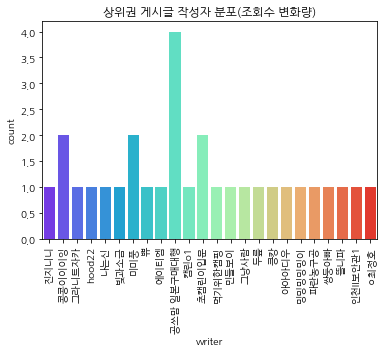

In [ ]:
#writer_plot=jungo_pdf[jungo_pdf['c_date']=='2022-06-12'].sort_values('views', ascending=False).iloc[:30][['writer']]
# 핫 작성자 분포
hot_writer=hot_jungo_sdf.orderBy(col('change').desc()).select('writer').limit(30).toPandas()
sns.countplot(hot_writer['writer'],palette='rainbow')
plt.title('상위권 게시글 작성자 분포(조회수 변화량)')
plt.xticks(rotation=90)
plt.show()

In [ ]:
hot_jungo_sdf.groupBy('sell_comp').count().show()

+---------+-----+
|sell_comp|count|
+---------+-----+
|     판매|   28|
|     완료|   20|
|   예약중|    2|
+---------+-----+



In [ ]:

hot_jungo_pdf

,category,title,sell_comp,writer,w_date,change
0,텐트/타프,비바돔 플러스 쉘터 카키 미개봉 팝니다.,판매,진지니니,2022.06.09.,309
1,기타캠핑용품,DOD 가마보코 웨건 + 온핑 웨건상판 판매합니다,판매,콩콩이이이잉,2022.06.06.,197
2,기타캠핑용품,DOD 가마보코 웨건 + 온핑 웨건상판 판매합니다,판매,콩콩이이이잉,2022.06.06.,196
3,텐트/타프,노르딕크로스 이클립스돔 22년형 1회피칭,완료,그라니트자카,2022.06.07.,186
4,침낭/매트,153매트 전기요 260 전기매트,판매,hood22,2022.05.29.,170
5,테이블/의자,헬리녹스 택티컬 리얼트리 체어원 2개 일괄,판매,나는신,2022.06.07.,169
6,텐트/타프,코베아 고스트팬텀,판매,빚과소금,2022.06.10.,149
7,계절/안전/위생용품,판매완료,완료,미미풍,2022.06.05.,143
8,기타캠핑용품,판매완료,완료,쀼,2022.06.01.,133
9,텐트/타프,스노우피크 리빙쉘 롱프로 아이보리,판매,에이티엠,2022.06.02.,124


In [ ]:
def find_brand(brand):
    for i in brand_list:
        if i in brand:
            return i
    return ''

In [ ]:
from collections import defaultdict
brand_set = defaultdict(int)
brand_list = []
brand_name=pd.read_csv(f'{directory}/brand_name_list.csv')
brand_name.drop(['Unnamed: 0'], axis = 1, inplace = True)
brand_name=brand_name.drop_duplicates()
brand_name['brand_name']=brand_name['brand_name'].map(lambda x: x.replace('[','').replace(']','').replace('(','').replace(')',''))
brand_list = set(brand_name['brand_name'])
#brand_name=list(brand_name['brand_name'])
brand_list = list(brand_list)




In [ ]:
# 브랜드 추가
jungo_pdf['brand']=hot_jungo_pdf['title'].map(lambda x: find_brand(x))
jungo_pdf

,Unnamed: 0,category,title,sell_comp,writer,w_date,views,c_date,brand
0,0,텐트/타프,미스터305 (블랙) 롱플+우레탄&숏+우레탄&이너 스킨2개 ((풀구성)),판매,뉴무꼬,09:07,10,2022-06-10,돔
1,1,텐트/타프,캠토리 슬라이드폴 280,판매,91듀듀,09:06,10,2022-06-10,DOD
2,2,텐트/타프,힐맨 얼리버드 업 스마트 텐트 2인용 팝니다.,판매,BBX,09:05,4,2022-06-10,DOD
3,3,텐트/타프,오크돔 M 카키 + 신 베티/우레탄창,판매,안녕뽀로로,09:05,21,2022-06-10,돔
4,4,텐트/타프,힐레베르그 니악 레드 미개봉,판매,학칸이,09:04,22,2022-06-10,1
...,...,...,...,...,...,...,...,...,...
99386,33142,키즈 캠핑/완구,"물놀이용으로,겨울에는 방한매트로 사용하는 어린이용 튜브",판매,oommm1452,2022.05.26.,51,2022-06-12,NaN
99387,33143,키즈 캠핑/완구,루엣비든 셔링 경량 해먹 270 세트 부쉬크래프트 캠핑 (웨빙 포함),완료,둘리할매,2022.05.25.,108,2022-06-12,NaN
99388,33144,키즈 캠핑/완구,장난감 팝니다.,판매,멀더바래요원,2022.05.25.,69,2022-06-12,NaN
99389,33145,키즈 캠핑/완구,물놀이 수중 전동 스쿠터,완료,kf2337,2022.05.25.,133,2022-06-12,NaN


In [ ]:
# 브랜드 이름 아닌거 제거
brand_list.remove('우레탄')
brand_list.remove('폴')
brand_list.remove('어린이')
brand_list.remove('경량')
brand_list.remove('물놀이')
brand_list.remove('블랙')
brand_list.remove('슬라이드')
brand_list.remove('돔')
brand_list.remove('튜브')
brand_list.remove('캠핑')
brand_list.remove('롱')
brand_list.remove('0')
brand_list.remove('3')
brand_list.remove('8')
brand_list.remove('신')
brand_list.remove('아이스')
brand_list.remove('텐트')
brand_list.remove('캠프')
brand_list.remove('미니')
brand_list.remove('세트')
brand_list.remove('해먹')
brand_list.remove('타프')
brand_list.remove('오토')
brand_list.remove('웨빙')
brand_list.remove('방수')
brand_list.remove('사이드월')
brand_list.remove('1')
brand_list.remove('넥')
brand_list.remove('카페')
brand_list.remove('리빙쉘')
brand_list.remove('기타')
brand_list.remove('아웃도어')
brand_list.remove('21년')
brand_list.remove('폴대')
brand_list.remove('SR')
brand_list.remove('-')
brand_list.remove('루프탑텐트')
brand_list.remove('에어')
brand_list.remove('파이어')
brand_list.remove('멀티')
brand_list.remove('X')
brand_list.remove('차박텐트')
brand_list.remove('원터치')
brand_list.remove('22년')
brand_list.remove('스타')
brand_list.remove('차박')
brand_list.remove('22년형')
brand_list.remove('어반')
brand_list.remove('에어텐트')
brand_list.remove('신형')
brand_list.remove('산')
brand_list.remove('정품')
brand_list.remove('러그')
brand_list.remove('론')
brand_list.remove('자동')
brand_list.remove('국내')
brand_list.remove('전용')
brand_list.remove('면타프')
brand_list.remove('윈드')
brand_list.remove('그라운드')
brand_list.remove('스피엘')
brand_list.remove('대형')
brand_list.remove('캠핑용')
brand_list.remove('이너텐트')
brand_list.remove('감성캠핑')
brand_list.remove('감성')
brand_list.remove('그라운드시트')
brand_list.remove('i')
brand_list.remove('2022')
brand_list.remove('타프스크린')
brand_list.remove('윈드가드')
brand_list.remove('프리미엄')
brand_list.remove('타프웨빙')
brand_list.remove('백패킹')
brand_list.remove('2초')
brand_list.remove('어메니티')
brand_list.remove('후')
brand_list.remove('사각')
brand_list.remove('하프')
brand_list.remove('방수포')
brand_list.remove('버터')
brand_list.remove('1인용')
brand_list.remove('리카')
brand_list.remove('맥스')
brand_list.remove('육각')
brand_list.remove('미래기업')
brand_list.remove('심')
brand_list.remove('우드')
brand_list.remove('TPU')
brand_list.remove('타포린')
brand_list.remove('하드탑')
brand_list.remove('타프폴대')
brand_list.remove('주문')
brand_list.remove('블랙코팅')
brand_list.remove('4단')
brand_list.remove('타프폴')

jungo_pdf['brand']=jungo_pdf['title'].map(lambda x: find_brand(x))
jungo_pdf.loc[jungo_pdf['brand']!='']

,Unnamed: 0,category,title,sell_comp,writer,w_date,views,c_date,brand
2,2,텐트/타프,힐맨 얼리버드 업 스마트 텐트 2인용 팝니다.,판매,BBX,09:05,4,2022-06-10,힐맨
6,6,텐트/타프,미니멀웍스 쉘터g 탄,판매,아산캠,09:03,29,2022-06-10,미니멀웍스
7,7,텐트/타프,헬리녹스 택티컬 코트 텐트 솔로,판매,조광구,09:02,42,2022-06-10,헬리녹스
8,8,텐트/타프,비바돔플러스 미개봉품,판매,바다가뷰,09:01,77,2022-06-10,비바
12,12,텐트/타프,"코베아 아웃백골드 텐트(루프,방수포,우레탄창,업라이트 폴대)",판매,rumble,09:00,18,2022-06-10,골
...,...,...,...,...,...,...,...,...,...
99379,33135,키즈 캠핑/완구,스태리 아이스박스28리터,완료,gosary1,2022.05.29.,162,2022-06-12,스태리
99384,33140,키즈 캠핑/완구,베른 엑티브체어 2개,판매,해피브링,2022.05.26.,198,2022-06-12,베른
99385,33141,키즈 캠핑/완구,빅앤트 폴딩박스 + 가스버너,완료,정리하는,2022.05.26.,169,2022-06-12,빅앤트
99387,33143,키즈 캠핑/완구,루엣비든 셔링 경량 해먹 270 세트 부쉬크래프트 캠핑 (웨빙 포함),완료,둘리할매,2022.05.25.,108,2022-06-12,루엣비든


In [ ]:
jungo_pdf.loc[jungo_pdf['c_date']=='2022-06-12'].sort_values(by='views', ascending=False).iloc[:50]

,Unnamed: 0,category,title,sell_comp,writer,w_date,views,c_date,brand
90122,23878,버너/화로/바베큐,스노우피크. 홀리데이 등 캠핑 장비 일체 판매합니다.,판매,우주안녕,2022.06.05.,1398,2022-06-12,스노우피크
95273,29029,기타캠핑용품,캠핑용품 정리합니다,판매,두릎,2022.06.07.,1393,2022-06-12,
68867,2623,텐트/타프,비바돔 플러스 쉘터 카키 미개봉 팝니다.,판매,진지니니,2022.06.09.,1241,2022-06-12,비바
96401,30157,기타캠핑용품,헬리녹스 의자 및 테이블 판매합니다,완료,서레이,2022.06.04.,1095,2022-06-12,의자
99007,32763,기타캠핑용품,스노우피크 igt용품 및 체어류 판매,판매,살사람만저요,2022.05.29.,931,2022-06-12,스노우피크
75577,9333,텐트/타프,비바돔 플러스 올리브그린 1회사용 팝니다.,완료,아고라,2022.06.02.,927,2022-06-12,비바
70633,4389,텐트/타프,헬리녹스 터널 판매(거래중),판매,사나구,2022.06.08.,889,2022-06-12,헬리녹스
72936,6692,텐트/타프,캠핑을 접은 관계로 텐트+용품 싹 정리하려고 합니다,완료,캠린이ㅋㅋ,2022.06.06.,880,2022-06-12,
69076,2832,텐트/타프,캠핑용품 일부 정리합니다.,완료,김까,2022.06.09.,851,2022-06-12,
77915,11671,텐트/타프,노스피크 퍼시픽 오션 소이밀크,완료,하계캠핑은나,2022.05.31.,818,2022-06-12,노스피크


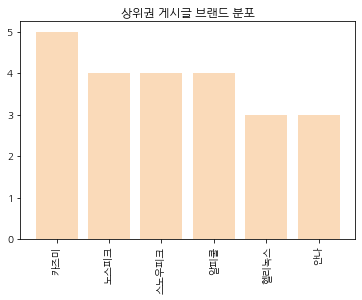

In [ ]:
brand_bar=jungo_pdf.loc[(jungo_pdf['c_date']=='2022-06-12') & (jungo_pdf['sell_comp']=='완료')].sort_values(by='views', ascending=False).iloc[:50].groupby('brand').count()[['title']].sort_values('title',ascending=False).iloc[1:7]
plt.bar(brand_bar.index, brand_bar['title'], align='center', alpha=0.7, color='#f9cb9c')
plt.xticks(rotation=90)
plt.title('상위권 게시글 브랜드 분포')
plt.savefig('7.png',transparent=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


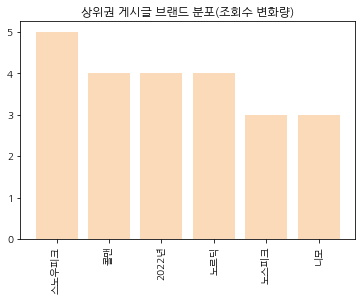

In [ ]:

hot_jungo_pdf['brand']=hot_jungo_pdf['title'].map(lambda x: find_brand(x))
hot_jungo_pdf.loc[jungo_pdf['brand']!='']
hot_brand_bar=hot_jungo_pdf.sort_values(by='change', ascending=False)[hot_jungo_pdf['sell_comp']=='완료'].iloc[:50].groupby('brand').count()[['title']].sort_values('title',ascending=False).iloc[1:7]
plt.bar(hot_brand_bar.index, brand_bar['title'], align='center', alpha=0.7, color='#f9cb9c')
plt.xticks(rotation=90)
plt.title('상위권 게시글 브랜드 분포(조회수 변화량)')
plt.savefig('8.png',transparent=True)
plt.show()

In [ ]:
jungo_pdf

,Unnamed: 0,category,title,sell_comp,writer,w_date,views,c_date,brand
0,0,텐트/타프,미스터305 (블랙) 롱플+우레탄&숏+우레탄&이너 스킨2개 ((풀구성)),판매,뉴무꼬,09:07,10,2022-06-10,
1,1,텐트/타프,캠토리 슬라이드폴 280,판매,91듀듀,09:06,10,2022-06-10,
2,2,텐트/타프,힐맨 얼리버드 업 스마트 텐트 2인용 팝니다.,판매,BBX,09:05,4,2022-06-10,2인용
3,3,텐트/타프,오크돔 M 카키 + 신 베티/우레탄창,판매,안녕뽀로로,09:05,21,2022-06-10,
4,4,텐트/타프,힐레베르그 니악 레드 미개봉,판매,학칸이,09:04,22,2022-06-10,
...,...,...,...,...,...,...,...,...,...
99386,33142,키즈 캠핑/완구,"물놀이용으로,겨울에는 방한매트로 사용하는 어린이용 튜브",판매,oommm1452,2022.05.26.,51,2022-06-12,
99387,33143,키즈 캠핑/완구,루엣비든 셔링 경량 해먹 270 세트 부쉬크래프트 캠핑 (웨빙 포함),완료,둘리할매,2022.05.25.,108,2022-06-12,루엣비든
99388,33144,키즈 캠핑/완구,장난감 팝니다.,판매,멀더바래요원,2022.05.25.,69,2022-06-12,
99389,33145,키즈 캠핑/완구,물놀이 수중 전동 스쿠터,완료,kf2337,2022.05.25.,133,2022-06-12,


(0, 0)


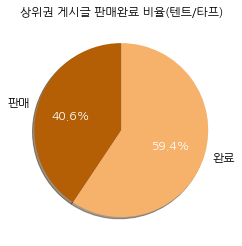

(0, 0)


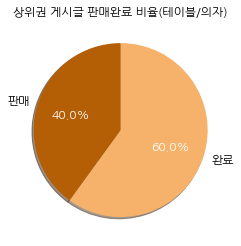

In [ ]:
tent_sell_comp=popular_jungo_sdf.filter(col('category')=='텐트/타프').select('sell_comp').groupBy('sell_comp').count().toPandas()
tent_sell_comp

labels=tent_sell_comp['sell_comp']
sizes = tent_sell_comp['count']
explode = [0 for i in range(len(labels))]
explode = tuple(explode)
print(explode)
patches, texts, autotexts = plt.pie(
    sizes,
    explode=explode,
    labels=labels,
    autopct="%1.1f%%",
    shadow=True,
    startangle=90,
    colors = ['#b45f06','#f6b26b']
)
# label 텍스트 스타일링
for t in texts:
  t.set_fontsize(12)
  t.set_color('black')

# pie 위의 텍스트에 대한 스타일링
for t in autotexts:
  t.set_fontsize(12)
  t.set_color('white')

plt.title("상위권 게시글 판매완료 비율(텐트/타프)")
plt.savefig('9.png',transparent=True)
plt.show()

tent_sell_comp=popular_jungo_sdf.filter(col('category')=='테이블/의자').select('sell_comp').groupBy('sell_comp').count().toPandas()
tent_sell_comp

labels=tent_sell_comp['sell_comp']
sizes = tent_sell_comp['count']
explode = [0 for i in range(len(labels))]
explode = tuple(explode)
print(explode)
patches, texts, autotexts = plt.pie(
    sizes,
    explode=explode,
    labels=labels,
    autopct="%1.1f%%",
    shadow=True,
    startangle=90,
    colors = ['#b45f06','#f6b26b']
)
# label 텍스트 스타일링
for t in texts:
  t.set_fontsize(12)
  t.set_color('black')

# pie 위의 텍스트에 대한 스타일링
for t in autotexts:
  t.set_fontsize(12)
  t.set_color('white')

plt.title("상위권 게시글 판매완료 비율(테이블/의자)")
plt.savefig('10.png',transparent=True)
plt.show()

# hot_sell_comp_pie=hot_jungo_sdf.orderBy(col('change').desc()).select(col('sell_comp')).limit(50).groupBy('sell_comp').count().toPandas()
# labels = hot_sell_comp_pie['sell_comp']
# sizes = hot_sell_comp_pie['count']
# explode = (0,0,0)
# patches, texts, autotexts = plt.pie(
#     sizes,
#     explode=explode,
#     labels=labels,
#     autopct="%1.1f%%",
#     shadow=True,
#     startangle=90
# )
# # label 텍스트 스타일링
# for t in texts:
#   t.set_fontsize(12)
#   t.set_color('black')

# # pie 위의 텍스트에 대한 스타일링
# for t in autotexts:
#   t.set_fontsize(12)
#   t.set_color('white')

# plt.title("상위권 게시글 판매완료 비율(조회수 변화량)")
# plt.show()